# Urban land cover data classification prediction using multiclass RBF-SVM model

## ABSTRACT

Urban land cover items prediction, based on the remote sensors' spatial and geometrical information, is becoming a prevailing area especially in urban monitoring, administration and programming. As a multi-classification task, a wide range of methods for analysis of urban land cover prediction continues to be proposed and assessed. In this paper, we review the SVMs (Support Vector Machines), a promising machine learning methodology with the introduction of multiclass mechanism and baseline approach. Furthermore, aimed at the baseline model's low performance, the proposed approach is presented to optimize the SVMs model, which mainly focus on the tunning key parameters C and γ by grid search with cross validation to make a soft-margin hyperplane. Others including scaling, data processing and unbalanced input adaption are also cncerned to enhance the preformance. The final model outperforms the baseline with the highest accuracy reaches nearly 87%. The RBF-SVM and approach methodology may facilitate the further research regarding to remote spatial land cover prediction.

## 1 INTRODUCTION

Urban land cover classification is one of the widest used applications in the feild of remote sensing. The detailed knowledge of land cover is an important input variable for several urban environmental monitoring, especially in some applications like the study of urban sprawl, urban development plan, population or architecture density and monitoring of urban growth. Such target is also corresponding to the 3 strategic area of AISingapore (healthcare, urban and fintech) in 2018.

The overall objective of the architecture recognition is to automatically categorize all pixels in an image into land cover classes or themes. Accordingly the classification algorithms are important for the success of urban land cover classification process. Furthermore, how to improve the classification accuracy is the major challenge which effects the result. A large range of classification algorithms has been developed and applied for classifying data, e.g. SVMs [Support Vector Machines in Remote Sensing: A Review], Random Forests [Random Forest in Remote Sensing: A Review of Applications and
Future Directions], KNNs, DTs and ANN. However, these articles seldom applied in the area of classifying urban cover land, or lack the complete algorithm parameters optimization aimed at enhancing the accuracy.

In this page, SVM (Support Vector Machine) method is mainly used to work as the classifers to urban land cover research. On this basis, procedure of data preparation and preprocessing is described and conducted completely. Thus, cross validation with grid search is used to tuning the significant parameters of RBF-SVMs (select the RBF as the kernal function of SVM), along with other aspects optimization. Finally, results and limits are displayed and discussed.
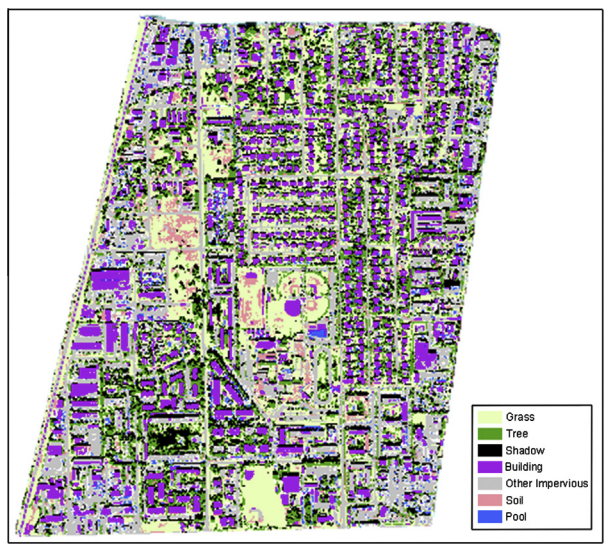
The dataset we used was obtained from the University of California, Irvine (IUC) Machine
Learning Depository (https://archive.ics.uci.edu/ml/datasets/Urban+Land+Cover).

## 2 BASELINE APPROACH

### 2.1 SVMs (Support Vector Machines)
In [A Practical Guide to Support Vector Classification], the author gave the brief definition of SVMs. Given a training set of instance-label pairs ($x_i$, $y_i$) and $y \in \{1, -1\}^l$, the support vector machines (SVM) require the solution of the following optimization problem:

\begin{align}
\min\limits_{w, b, \xi} \frac{1}{2}w^Tw + C\sum_{i=1}^{l} \xi_i \\
subject\ to\quad  y_i(w^T\phi(x_i) + b) \ge 1-\xi_i, \ \xi_i \ge 0.
\end{align}


Here training vectors $x_i$ are mapped into a higher (maybe infinite) dimensional space by the function $\phi$. SVM finds a linear separating hyperplane with the maximal margin in this higher dimensional space. $C > 0$ is the penalt parameter of the error term. Furthermore, $K(x_i, x_j) = \phi(x_i)^T\phi(x_j)$ is called the kernel function. The basic kernals we considered in our research including:
- linear: $K(x_i, x_j)=X_i^Tx_j$.
- polynomial: $K(x_i, x_j)=(\gamma x_i^Tx_j + \gamma)^d, \gamma > 0$.
- radial basis function (RBF): $K(x_i, x_j) = exp(-\gamma\parallel x_i - x_j\parallel ^2), \gamma > 0$

Here, $\gamma, r, d$ are kernel parameters.


### 2.2 Multiclass SVMs
Traditional SVMs are used to handle the binary classification problem, in order to tackle the multiclass issues, two primary methodologies are introduced as OvO (One versus One) and OvR (One versus Rest).
- **OvR (One versus Rest)**

OvR strategy involves training a single classifier per class, with the samples of that class as positive samples and all other samples as negatives. This strategy requires the base classifiers to produce a real-valued confidence score for its decision, rather than just a class label; discrete class labels alone can lead to ambiguities, where multiple classes are predicted for a single sample.
- **OvO (One versus One)**

In the OvO reduction, one trains $K (K − 1) / 2$ binary classifiers for a K-way multiclass problem; each receives the samples of a pair of classes from the original training set, and must learn to distinguish these two classes. At prediction time, a voting scheme is applied: all $K (K − 1) / 2$ classifiers are applied to an unseen sample and the class that got the highest number of "+1" predictions gets predicted by the combined classifier.

![image](https://www.researchgate.net/profile/Yijing_Li5/publication/311977198/figure/fig7/AS:451738219094023@1484714192735/OVO-and-OVA-decomposition-schemes-Note-In-the-OVA-scheme-one-class-is-treated-as-a.png)

In this research, we used SVC python library which contains the "ovo" and "ovr" as the decision functions.

### 2.3 Dataset exploration
In our research, the urban land cover dataset was obtained from the University of California, Irvine (IUC) Machine
Learning Depository (https://archive.ics.uci.edu/ml/datasets/Urban+Land+Cover). This high spatial urban landcover dataset of Deerfield Beach, Florida, was created using geographic object-based image analysis methods, with 9 classifications with the labels: **trees, grass, soil, concrete, asphalt, buildings, cars, pools, and shadows**. 

#### Data separation
 The whole dataset contains 675 samples, which are already divided into 507 (75%) train samples and 147 (25%) test samples. Each row has 147 variables of 7 coarser scale with 21 independent variables, which represent spectral, size, shape, and texture information. The details of the variables record in appendix. So our objective is building a model based on the train dataset, and apply to predict on the test dataset.

**Data features selection**

The dataset contains 1 class that means class target and 147 variables, obviously the variables dimensions are too huge. Since the 147 variables belong to 7 sets with the equivalent 21 variables, the only differences are the sensor image coarsers. Thus, the first 21 variables are picked out as the variables, remaining parts work as the comparative datasets to backup. The same operations are applied to both train dataset and test dataset, so as to get the train samples with the shape of 507\*21\*1 and test samples with the shape of 147\*21\*1.

**Target dummy code**

In order to specify the targets better, the target Y are defined as the dummy codes of 9 different urban items from 1 to 9. Hence, the train target distributions, correlation matrics and variables distributions could be got as blow. In addition, the dataset existed no NAs or Null data, thus it's no need to handle the missing values.

In [91]:
# -*- coding: utf-8 -*-
__author__ = 'alexjzy'
# codes import part
import numpy as np
import seaborn as sns
np.random.seed(42)
import os

# To plot pretty figures
import matplotlib
import matplotlib.pyplot as plt

# Sklearn part
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics.scorer import make_scorer
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV
# Pandas part
import pandas as pd
pd.set_option('display.max_columns', 500)

In [92]:
### Load dataset
path = os.getcwd()

train_path = "/train.csv"
test_path = "/test.csv"
dataset_path = "/dataset"

data_train = pd.read_csv(path + dataset_path + train_path)
data_test = pd.read_csv(path + dataset_path + test_path)
data_all = pd.concat([data_train, data_test])

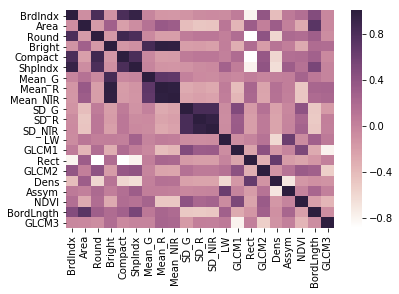

In [93]:
### correlation matrics
data_train.corr()
sns.heatmap(data_all.iloc[:, 1:22].corr(), cmap=sns.cubehelix_palette(light=1, as_cmap=True))

In [94]:
### get the train target statistics result
data_train['class'].value_counts()

building     97
concrete     93
tree         89
grass        83
shadow       45
asphalt      45
car          21
soil         20
pool         14
Name: class, dtype: int64

In [95]:
### variables distribution summary
data_train.iloc[:, 1:22].describe()

,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,SD_G,SD_R,SD_NIR,LW,GLCM1,Rect,GLCM2,Dens,Assym,NDVI,BordLngth,GLCM3
count,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000
mean,2.025720,562.504931,1.237574,165.612939,2.187081,2.277318,166.290355,162.291953,168.256667,10.725227,9.298422,9.151183,2.334320,0.562426,0.721953,6.546154,1.588225,0.626193,0.025464,189.613412,2962.553116
std,0.619254,698.655240,0.561988,63.230806,0.874054,0.718441,59.217648,73.455101,69.702475,4.968761,4.204789,4.115763,1.695255,0.146751,0.147239,0.405564,0.343741,0.235664,0.174755,109.208690,873.563287
min,1.000000,22.000000,0.000000,26.850000,1.000000,1.040000,22.910000,26.520000,31.110000,3.550000,2.020000,2.090000,1.000000,0.090000,0.240000,4.920000,0.450000,0.090000,-0.380000,20.000000,874.100000
25%,1.580000,159.000000,0.840000,127.485000,1.650000,1.715000,146.460000,97.585000,111.715000,6.985000,6.380000,6.460000,1.430000,0.460000,0.640000,6.360000,1.355000,0.450000,-0.100000,108.000000,2393.865000
50%,1.950000,323.000000,1.210000,170.650000,2.000000,2.180000,189.630000,158.280000,167.750000,9.290000,8.180000,8.170000,1.870000,0.570000,0.750000,6.580000,1.610000,0.680000,-0.060000,172.000000,2948.700000
75%,2.380000,681.500000,1.565000,224.825000,2.490000,2.675000,206.780000,237.375000,238.480000,13.330000,11.665000,11.125000,2.655000,0.680000,0.830000,6.790000,1.820000,0.820000,0.185000,253.000000,3397.605000
max,4.530000,5767.000000,3.520000,245.870000,8.070000,5.410000,239.370000,253.610000,253.630000,30.870000,29.650000,28.380000,22.670000,0.890000,1.000000,7.510000,2.300000,1.000000,0.410000,662.000000,6351.550000


In [96]:
### test the rough svm 
trainX = data_train.iloc[:, 1:22]
trainY = data_train.iloc[:, 0]

testX = data_test.iloc[:, 1:22]
testY = data_test.iloc[:, 0]


In [113]:
### SVMs with default parameters
def svmRoughModel(mod, kernel, trainX, trainY, testX, testY):
    mod.fit(trainX, trainY)
    
    train_pred = model.predict(trainX)
    train_acc = accuracy_score(trainY, train_pred)
    print("%s train accuracy: %f" % (kernel, train_acc))
    
    test_pred = model.predict(testX)
    test_acc = accuracy_score(testY, test_pred)
    print("%s test accuracy: %f" % (kernel, test_acc))
    
# RBF
model = SVC(kernel = 'rbf', random_state = 25, decision_function_shape='ovo')
svmRoughModel(model ,'rbf', trainX, trainY, testX, testY)
model

rbf train accuracy: 1.000000
rbf test accuracy: 0.154762


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=25, shrinking=True,
  tol=0.001, verbose=False)

### 2.4 Baseline multiclass experiment

Baseline steps:

- Transform data to the format of an SVM package.
- Try the RBF kernel to build model based on train samples.
- Test

After the basic features selection and dataset split, we used the scikit-learn library "SVC" to work as the SVM classifier, set the kernel to be "rbf" and other parameters are all default. The result showed train dataset accuracy reached 1.00, however, the test dataset accuracy was only 0.15 using the trained model. As such, the model was obviously over-fit. And the multiclass methods showed no difference of using 'ovo' or 'ova'.

## 3 PROPOSED APPROACH

The baseline model based on the train dataset, showed a weak performance on test dataset, the root cause was that the specified hyperplanes confirmed by support vectors worked as hard margins. In addition, train dataset showed quite tremendous range gap between each column, and target labels quantities were imbalanced. Several processing and optimization were necessary to be researched in our proposed approaches.

As such, the proper procedures were proposed step by step as follows:
1. Scaling on train samples, apply the same scaler on test samples.
2. Implement $C$ and $\gamma$ to build soft margins for RBF kerel.
3. Split the dataset into train, validation and test dataset.
4. Apply grid search with cross validation to confirm $C$ and $\gamma$.
5. Take unbalanced class numbers and excluding outliers into consideration.
6. Use the best parameters $C$ and $\gamma$ to train the whole training dataset.
7. Test on test samples.
8. Analyze the results.

### 3.1 Scaling the dataset

Scaling before applying SVM is very important. The main advantage of scaling is to avoid attributes in greater numeric ranges dominating those in smaller numeric ranges. Another advantage is to avoid numerical difficulties during the calculation. Because kernel values usually depend on the inner products of feature vectors. We recommend linearly.

In our dataset, the variables numerical range difference showed huge. For instance, variable "GLCM3" occupied the range from 874 to 6341, meanwhile variable "RECT" just took 0.24 to 1. Such difference led to "GLCM3" domination across the training dataset. Accordingly, we built the linear scaler to convert all the variables into \[-1, 1\],  the same scaler would be applied to the test dataset.

### 3.2 Cross validation on train dataset

Cross-validation is a model validation technique for assessing how the results of a statistical analysis will generalize to an independent dataset. It is mainly used in settings where the goal is prediction, and one wants to estimate how accurately a predictive model will perform in practice. For the previous baseline experiment, the lack of the validation couldn't guarantee the model's generalization to all samples. The goal of cross validation is to define a dataset to "test" the model in the training phase, in order to limit problems like overfitting.

In our proposed approach, the k-fold cross-validation were used to randomly partition the train dataset into k equal sized subsets. Throughout the k subsets, a single subsample is retained as the validation data for testing the model, and the k-1 subsets are used to train the model. The cross-validation process is then repeated k times, and calculate the average score from k results. k was identified to be 3 in our experiment, thus the validation samples quantity were nearly equal to test samples.

In experiment, from "sklearn.model_selection" library, the "cross_val_score" package was imported to realize the cross validation.

### 3.3 Grid search to confirm C and $\gamma$ of RBF kernel

Since the RBF kernel is a reasonable first choice, which could handle the case when the relation between class labels and attributes is nonlinear. There are two parameters for an RBF kernel C and γ to find out the soft margin between each classification. The goal is to identify good (C, γ) so that the classifier can enhance the prediction accuracy. 

According to Lin's recommendation, the "grid-search" is usually used combined with the cross-validation in our case. Two major steps were followed: Firstly, tried exponentially growing sequences of C and γ to identify the coarse range for these 2 parameters. For C the approximate parameters were set to be \[1, 10, 100, 1000\], and γ was set to be \[1e-1, 1e-2, 1e-3, 1e-4, 1e-5\]. Secondly, a finer grid search on the neighborhood of first step ranges about C and γ. In doing this, confirm the C and γ to define the SVMs based on the soft margins.

In experiment, from "sklearn.model_selection" library, "GridSearchCV" package was used to try the grid search. In the first step, the best choice for (C, γ) to be (10, 0.01). After that, the further procedures to refine the best (C, γ) as narrow range C with range \[10, 20\] step = 1 and γ with range \[0.001, 0.1\] step = 0.001, the final best parameters for (C, γ) is (15, 0.15) with the highest validation accuracy 0.7968.

### 3.4 Optimization by balancing class weight

Since the train dataset class magnitudes were not balanced (the largest number of "building" label is 97, but the smallest number of "pool" label is 14). Thus the weights of each class were taken into consideration to reduce the effect of the imbalance.

In experiment, from "sklearn.model_selection" library, in "GridSearchCV" the "class_weight" was set to be balance.

### 3.5 Optimization by eliminating outliers

Since the training dataset may contained several outliers samples, SVMs would be influenced by the outliers so as to change the margin between two classifications (SVMs outlier sensitivity shown in figure). Therefore, outliers elimination may be valuable to build a more appropriate model, and enhance the prediction accuracy.

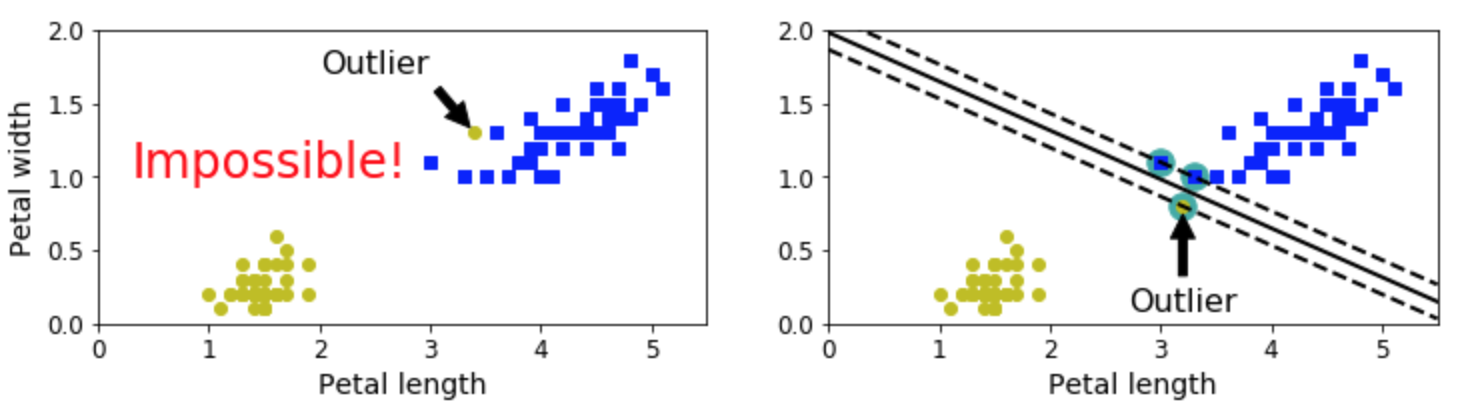

In the experiment, exclude the outliers according to the boxplot of scaled training samples. The boxplot of training samples were shown in figure. The samples which contain the values beyond 6 were concerned as the outliers, and 7 records removed from the training dataset. Thus the train dataset size reduced from 507 to 500. The modified training dataset would also process by the 8 steps described in section 3, and compared with the results of complete train dataset.

## EXPERIMENTAL RESULTS

In [114]:
# convert the labels to encode numbers as a new column
def convertClassToEncodeNumber(df, benchmarkCol, newColName):
    labelEncoder = preprocessing.LabelEncoder()  # initial encoder
    labelEncoder.fit(df.loc[:, benchmarkCol])
    encodedData = labelEncoder.transform(df.loc[:, benchmarkCol])
    df[newColName] = encodedData
    return df

# scaler
def standardScaler(df):
    scaler = preprocessing.StandardScaler().fit(df)
    return scaler

# draw confusion matrix
def drawConfusionMatrix(title, cm):
    labels = sorted(data_train.iloc[:, 0].unique())
    ax= plt.subplot()
    heatmap = sns.heatmap(cm, annot=True, cmap="YlGnBu", ax = ax)
    heatmap.xaxis.set_ticklabels(labels, rotation=45); 
    heatmap.yaxis.set_ticklabels(labels, rotation=0);
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title(title)

(507,)

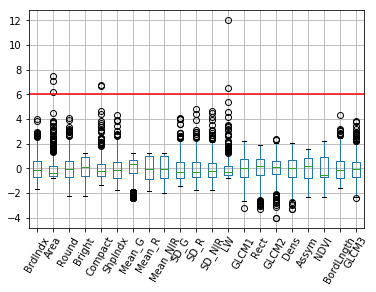

In [115]:
data_train = convertClassToEncodeNumber(data_train, "class", "Y")
data_test = convertClassToEncodeNumber(data_test, "class", "Y")
# several sets of data
# 1:22 ''
# 22:43 40
# 43:64 60
# 64:85 80
# 85:106 100
# 106:127 120
# 127:148 140
trainX = data_train.iloc[:, 1:22]
trainY = data_train.iloc[:, -1]
trainXs = standardScaler(trainX).transform(trainX)
trainX_scale = pd.DataFrame(trainXs, columns=trainX.columns) 


testX = data_test.iloc[:, 1:22]
testY = data_test.iloc[:, -1]
testX_scale = standardScaler(trainX).transform(testX)

bxplot = pd.DataFrame(trainX_scale).boxplot()
bxplot.xaxis.set_ticklabels(trainX_scale.columns, rotation=60)
bxplot.axhline(y=6, color='r', linestyle='-')
trainY.shape


#### Outlier module

Handle outliers from the train dataset, in that the svm is sensetive for the outliers.


[Text(0,0,'BrdIndx'),
 Text(0,0,'Area'),
 Text(0,0,'Round'),
 Text(0,0,'Bright'),
 Text(0,0,'Compact'),
 Text(0,0,'ShpIndx'),
 Text(0,0,'Mean_G'),
 Text(0,0,'Mean_R'),
 Text(0,0,'Mean_NIR'),
 Text(0,0,'SD_G'),
 Text(0,0,'SD_R'),
 Text(0,0,'SD_NIR'),
 Text(0,0,'LW'),
 Text(0,0,'GLCM1'),
 Text(0,0,'Rect'),
 Text(0,0,'GLCM2'),
 Text(0,0,'Dens'),
 Text(0,0,'Assym'),
 Text(0,0,'NDVI'),
 Text(0,0,'BordLngth'),
 Text(0,0,'GLCM3')]

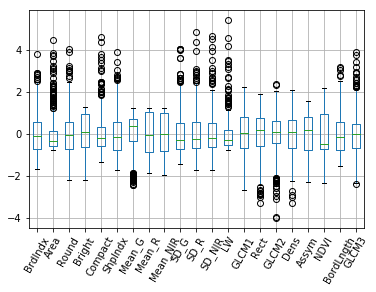

In [116]:
outliers = trainX_scale.loc[(trainX_scale > 6).any(1)]
trainX_scale_better = trainX_scale.drop(outliers.index)
trainY_better = trainY.drop(outliers.index)

bxplot = pd.DataFrame(trainX_scale_better).boxplot()
bxplot.xaxis.set_ticklabels(trainX_scale_better.columns, rotation=60)

In [142]:
# SVM RBF
# dataset without outlier: trainX_scale_better, trainY_better
# dataset has outlier: trainX_scale, trainY

# cRange = [1, 10, 100, 1000]
# gammaRange = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
# cRange = range(5, 30)

cRange = [22]
gammas= range(1, 100)
gammaRange = 0.001 * np.array(gammas)
parameters = [{'kernel': ['rbf'], 'gamma': gammaRange,
                     'C': cRange}]
clf = GridSearchCV(cv = 3, estimator=SVC(decision_function_shape='ovo', class_weight="balanced"), param_grid = parameters)
clf.fit(trainX_scale_better, trainY_better)
print("Best parameters for the C and gamma: %s" % clf.best_params_)
print("Best parameters accuracy for validation: %s" % clf.best_score_)
clf.grid_scores_

Best parameters for the C and gamma: {'C': 22, 'gamma': 0.01, 'kernel': 'rbf'}
Best parameters accuracy for validation: 0.784


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.73800, std: 0.02909, params: {'C': 22, 'gamma': 0.001, 'kernel': 'rbf'},
 mean: 0.74800, std: 0.01335, params: {'C': 22, 'gamma': 0.002, 'kernel': 'rbf'},
 mean: 0.75800, std: 0.01447, params: {'C': 22, 'gamma': 0.003, 'kernel': 'rbf'},
 mean: 0.76200, std: 0.01614, params: {'C': 22, 'gamma': 0.004, 'kernel': 'rbf'},
 mean: 0.77200, std: 0.01377, params: {'C': 22, 'gamma': 0.005, 'kernel': 'rbf'},
 mean: 0.77000, std: 0.00379, params: {'C': 22, 'gamma': 0.006, 'kernel': 'rbf'},
 mean: 0.77200, std: 0.00528, params: {'C': 22, 'gamma': 0.007, 'kernel': 'rbf'},
 mean: 0.77800, std: 0.00113, params: {'C': 22, 'gamma': 0.008, 'kernel': 'rbf'},
 mean: 0.78200, std: 0.00712, params: {'C': 22, 'gamma': 0.009000000000000001, 'kernel': 'rbf'},
 mean: 0.78400, std: 0.01630, params: {'C': 22, 'gamma': 0.01, 'kernel': 'rbf'},
 mean: 0.77800, std: 0.01682, params: {'C': 22, 'gamma': 0.011, 'kernel': 'rbf'},
 mean: 0.77800, std: 0.01253, params: {'C': 22, 'gamma': 0.012, 'kernel': 'rbf'},
 m

dataset without outlier: trainX_scale_better, trainY_better
dataset has outlier: trainX_scale, trainY

Train Accuracy: 0.916000
Test Accuracy: 0.869048


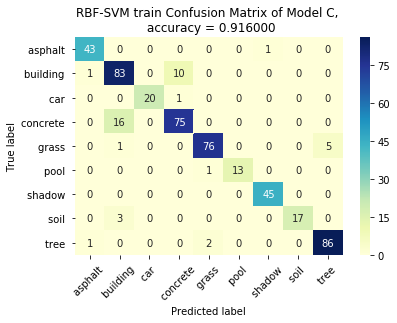

In [152]:
rbf_svm = SVC(kernel = 'rbf', C=29, gamma=0.01, random_state = 25, decision_function_shape='ovo')
rbf_svm.fit(trainX_scale, trainY)
# rbf_svm
trainY_pred = rbf_svm.predict(trainX_scale_better)
accuracyTrain = accuracy_score(trainY_better, trainY_pred)
print("Train Accuracy: %f" % accuracyTrain)

testY_pred = rbf_svm.predict(testX_scale)
testY_pred

accuracyTest = accuracy_score(testY, testY_pred)
print("Test Accuracy: %f" % accuracyTest)

cm = confusion_matrix(trainY_better, trainY_pred)
title = 'RBF-SVM train Confusion Matrix of Model C, \n accuracy = %f' % accuracyTrain
drawConfusionMatrix(title, cm)



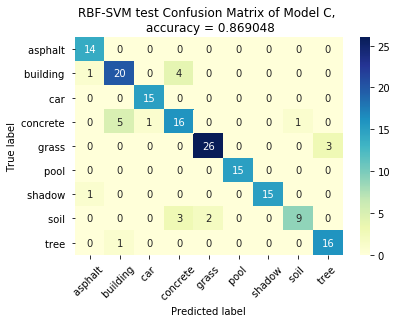

In [153]:
cm = confusion_matrix(testY, testY_pred)
title = 'RBF-SVM test Confusion Matrix of Model C, \n accuracy = %f' % accuracyTest
drawConfusionMatrix(title, cm)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/site-packages/matplotlib/pyplot.py'>

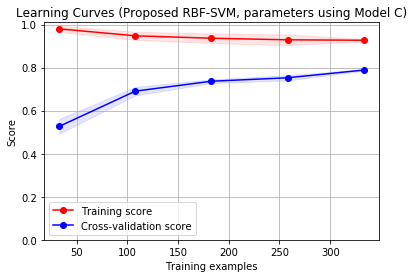

In [147]:
rbf_svm

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

cv = ShuffleSplit(n_splits=3, test_size=1/3, random_state=0)
estimator = rbf_svm
title = "Learning Curves (Proposed RBF-SVM, parameters using Model C)"
plot_learning_curve(estimator, title, trainX_scale_better, trainY_better, ylim=(0, 1.01), cv=cv, n_jobs=4)

## CONCLUSIONS

SVMs theories and methodologies were classical with high-performance applied into many domains. In this research, multiclass SVMs model with RBF kernel were trained, validated and tested based on the urban land cover data, and applied to predict the urban landcover targets classifications. By modifying from the baseline approach, we proposed our RBF-SVMs models with several optimizations: scaling, tuning parameters by grid search, cross validation, balancing input class weight and exclusion of outliers. In the experiments, several models performances with different configuration or parameters were also compared with each other. The final prediction accuracy enhanced a lot from 15.48% (baseline SVMs model) to 86.90% (proposed RBF-SVMs model). Such results, methods and research procedures are valuable and useful in such similar areas of urban remote detection and telemetering.

## REFERENCES